<a href="https://colab.research.google.com/github/okorch/project_AI_cancer/blob/main/Cancer_data_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузка датасета и создание файла с преобразованными данными

Загруз архива с гугл-диска

In [ ]:
!unzip "/content/drive/MyDrive/histopathologic-cancer-detection.zip";

In [2]:
import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image
import pandas as pd


In [3]:
labels_df = pd.read_csv('/content/train_labels.csv')

Представление датасета

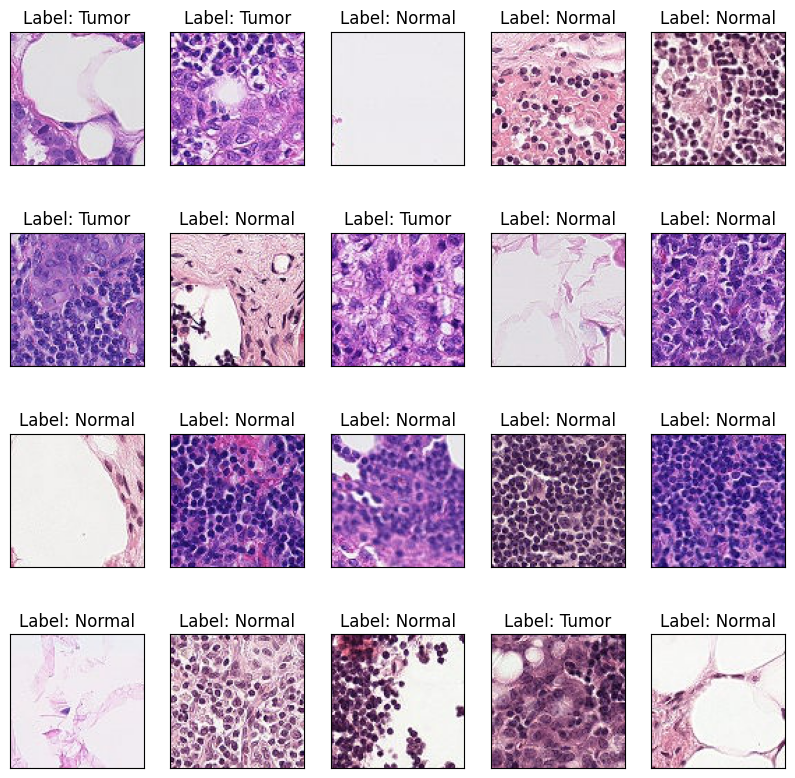

In [4]:
fig = plt.figure(figsize=(10, 10))
path2data = "/content/train"
train_imgs = os.listdir(path2data)
for idx, img in enumerate(np.random.choice(train_imgs, 20)):
    ax = fig.add_subplot(4, 20//4, idx+1)
    im = Image.open(path2data + "/" + img)
    plt.imshow(im)
    plt.xticks([])
    plt.yticks([])
    
    lab = labels_df.loc[labels_df["id"] == img.split('.')[0], 'label'].values[0]
    ax.set_title(f'Label: {["Tumor" if lab == 1 else "Normal"][0]}')

In [ ]:
train  = pd.read_csv('/content/train_labels.csv')
train

In [ ]:
 filenames = os.listdir('/content/train')
 filenames

In [7]:
import torch.nn as nn
import torch.nn.functional as F  # Functional

In [8]:
import torchvision.transforms as transforms

Преобразование в тензоры

In [9]:
from tqdm import tqdm

Созадние массивов с лейблами и 

In [ ]:
X_train = list()
y_train = list()
n = 0
for i in tqdm(filenames[:10000]):
  image = Image.open('/content/train/'+i)
  image = transforms.ToTensor()(image)
  image = transforms.Resize((64, 64))(image)
  X_train.append(image)
  y_train.append(int(train[train['id'] == i[0:-4]]['label']))
  n = n+1  

In [25]:
import pickle

In [26]:
with open('/content/drive/MyDrive/X_train_new.pickle', 'wb') as f:
  pickle.dump((X_train, y_train), f)
 

In [27]:
with open('/content/drive/MyDrive/X_train_new.pickle', 'rb') as f:
  X_train, y_train = pickle.load(f)

In [ ]:
X_train

In [35]:
int(y_train[0])

0